# 훈련 성능 향상하기
가장 좋은 모델은 과적합되지 않고, 일반화가 가능한 모델이라고 할 수 있음.
하지만 일반적으로 세가지 문제가 발생하는데, 훈련이 되지않거나(손실이 줄어들지 않음), 훈련은 진행되지만 모델이 일반화를 하지못함(모델의 성능이 기준점을 넘지 못함), epochs가 늘어남에 따라 손실이 줄고 기준점을 넘지만 과소적합되는 경우가 있음.
이런 문제를 해결하기 위해서는 경사하강법의 최적화된 하이퍼 파라미터 튜닝이 필요함.  
옵티마이저 선택, 모델 가중치의 초깃값 분포, 학습률, 배치크기 등이 있음.

## MNIST 예시

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train,train_label),_=mnist.load_data()

In [5]:
train_dt=train.reshape(len(train),28*28)
train_dt=train_dt.astype('float32')/255

## 학습률을 1로 설정해 모델을 훈련(비정상적으로 높은 학습률)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')
model.fit(train_dt,train_label,
         epochs=10,
         batch_size=128,
         validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 609.8233 - accuracy: 0.3562 - val_loss: 2.1716 - val_accuracy: 0.2200
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 3.6287 - accuracy: 0.2488 - val_loss: 4.1793 - val_accuracy: 0.3419
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 3.0753 - accuracy: 0.2498 - val_loss: 2.1367 - val_accuracy: 0.2325
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 2.9720 - accuracy: 0.2719 - val_loss: 2.2309 - val_accuracy: 0.3126
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 2.3796 - accuracy: 0.2691 - val_loss: 7.3194 - val_accuracy: 0.3288
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5293 - accuracy: 0.2511 - val_loss: 2.4446 - val_accuracy: 0.2578
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 2.5015 - accuracy: 0.2696 - val_loss: 2.3118 - val_accuracy: 0.25

성능이 0.2~0.3에서 올라가지않음.

### 학습률을 0.01로 설정해서 학습 진행  
optimizer 튜닝만으로 모델의 성능이 크게 차이남.  
학습률을 낮게하면 모델의 성능이 향상될 수 있지만, 학습 시간이 길어질 수 있음.  
학습률을 높게하면 모델의 성능이 저하될 수 있지만, 학습 시간은 짧아짐.  
적절한 학습률을 설정해야 모델의 효율성을 높일 수 있음.  


학습률 이외에도 배치사이즈를 늘려 분산이 낮은 Gradient가 만들어 질 수 있음.

In [13]:
model=keras.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')
model.fit(train_dt,train_label,
         epochs=10,
         batch_size=128,
         validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3676 - accuracy: 0.9131 - val_loss: 0.1420 - val_accuracy: 0.9612
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1405 - accuracy: 0.9639 - val_loss: 0.1701 - val_accuracy: 0.9585
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1151 - accuracy: 0.9729 - val_loss: 0.1589 - val_accuracy: 0.9697
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0979 - accuracy: 0.9782 - val_loss: 0.2272 - val_accuracy: 0.9616
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0835 - accuracy: 0.9821 - val_loss: 0.2612 - val_accuracy: 0.9661
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0727 - accuracy: 0.9854 - val_loss: 0.1963 - val_accuracy: 0.9744
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0642 - accuracy: 0.9868 - val_loss: 0.2649 - val_accuracy: 0.9688

## 모델 용량 늘리기(층 확장)
### 간단하게 로지스틱 회귀 분류 모델 생성

In [28]:
model=keras.Sequential([
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')
history=model.fit(train_dt,train_label,
          epochs=20,
          batch_size=256,
          validation_split=0.2)

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 0.8703 - accuracy: 0.7921 - val_loss: 0.4346 - val_accuracy: 0.8904
Epoch 2/20
188/188 [==============================] - 1s 3ms/step - loss: 0.4032 - accuracy: 0.8928 - val_loss: 0.3385 - val_accuracy: 0.9076
Epoch 3/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3428 - accuracy: 0.9067 - val_loss: 0.3102 - val_accuracy: 0.9130
Epoch 4/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3185 - accuracy: 0.9123 - val_loss: 0.2949 - val_accuracy: 0.9181
Epoch 5/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3042 - accuracy: 0.9160 - val_loss: 0.2859 - val_accuracy: 0.9215
Epoch 6/20
188/188 [==============================] - 1s 3ms/step - loss: 0.2951 - accuracy: 0.9174 - val_loss: 0.2805 - val_accuracy: 0.9224
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.2884 - accuracy: 0.9198 - val_loss: 0.2767 - val_accuracy: 0.9237
Epoch 

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
import pandas as pd
history_df=pd.DataFrame(history.history,columns=history.history.keys())
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.870254,0.792063,0.434558,0.890417
1,0.403155,0.892771,0.338468,0.907583
2,0.342771,0.906729,0.310161,0.913000
3,0.318548,0.912292,0.294896,0.918083
4,0.304239,0.916021,0.285893,0.921500
5,0.295090,0.917354,0.280549,0.922417
6,0.288353,0.919771,0.276691,0.923750
7,0.283028,0.921167,0.274485,0.924500
8,0.279169,0.922375,0.272274,0.924000
9,0.275798,0.922813,0.269141,0.925750


손실이 0.275쯤에서 더이상 개선되지 않는 것으로 보임.  
이런 경우 모델의 용량을 늘려 성능을 개선할 수 있음

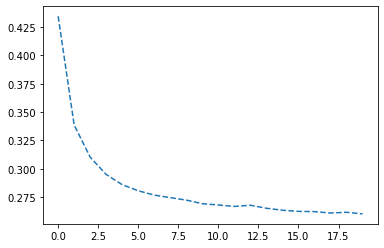

In [30]:
import matplotlib.pyplot as plt
plt.plot(history_df.index,history_df.val_loss,'--')

### 층을 2개 늘려 모델 재생성

In [32]:
model=keras.Sequential([
    layers.Dense(96,activation='relu'),
    layers.Dense(96,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')
history2=model.fit(train_dt,train_label,
                  epochs=20,
                  batch_size=256,
                  validation_split=0.2)

Epoch 1/20
188/188 [==============================] - 2s 6ms/step - loss: 0.4483 - accuracy: 0.8760 - val_loss: 0.2644 - val_accuracy: 0.9221
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.2059 - accuracy: 0.9400 - val_loss: 0.1826 - val_accuracy: 0.9454
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1498 - accuracy: 0.9550 - val_loss: 0.1486 - val_accuracy: 0.9546
Epoch 4/20
188/188 [==============================] - 1s 5ms/step - loss: 0.1166 - accuracy: 0.9658 - val_loss: 0.1482 - val_accuracy: 0.9547
Epoch 5/20
188/188 [==============================] - 1s 6ms/step - loss: 0.0941 - accuracy: 0.9716 - val_loss: 0.1161 - val_accuracy: 0.9670
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.0780 - accuracy: 0.9767 - val_loss: 0.1237 - val_accuracy: 0.9617
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.0657 - accuracy: 0.9797 - val_loss: 0.0953 - val_accuracy: 0.9730
Epoch 

In [33]:
history_df2=pd.DataFrame(history2.history,columns=history2.history.keys())

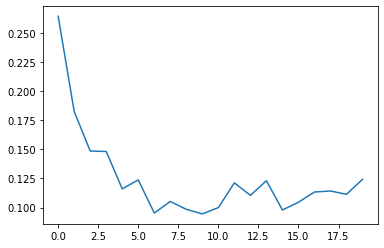

In [34]:
plt.plot(history_df2.index,history_df2.val_loss)

5번째 에포크에서 이미 최저 손실을 달성함. 층을 늘려 이전보다 모델의 성능이 향상됨.